# Experiment with advanced weighted edges
This experiment evaluates the performance of the NodeNet model using two graphs:
1. original where we assign weights of 1 and 0 only
1. advanved where we assign weights based on the nodes

In [1]:
from context import km3net
from km3net.utils import DATADIR
import km3net.data.model as data_model
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv(DATADIR+'/processed/slice-mixed.csv')
df

,pos_x,pos_y,pos_z,time,label,event_id,timeslice
0,12.555,48.502,168.889,87992320.0,0,NaN,5866
1,-26.179,86.588,83.441,87856768.0,0,NaN,5857
2,11.951,85.369,178.341,9233133.0,0,NaN,615
3,-36.713,67.022,37.789,18488686.0,0,NaN,1232
4,-8.077,86.802,65.459,87865636.0,0,NaN,5857
...,...,...,...,...,...,...,...
4172,0.757,-78.055,103.741,18494927.0,0,NaN,1232
4173,-6.929,-58.112,160.359,87996937.0,0,NaN,5866
4174,69.330,48.721,121.789,18480099.0,0,NaN,1232
4175,12.663,48.358,94.459,24567892.0,0,NaN,1637


In [3]:
test_df = pd.read_csv(DATADIR+'/processed/slice-1637.csv')
test_df

,pos_x,pos_y,pos_z,time,label,event_id,timeslice
0,-65.053,86.247,83.611,24555001.0,0,NaN,1637
1,-57.457,-5.340,83.611,24555001.0,0,NaN,1637
2,39.767,103.382,56.111,24555006.0,0,NaN,1637
3,58.965,31.852,160.359,24555006.0,0,NaN,1637
4,21.082,31.655,37.731,24555010.0,0,NaN,1637
...,...,...,...,...,...,...,...
8537,31.140,86.439,94.459,24569988.0,0,NaN,1637
8538,-74.918,65.066,94.341,24569991.0,0,NaN,1637
8539,-36.817,-77.713,187.041,24569993.0,0,NaN,1637
8540,-8.273,-21.854,169.111,24569995.0,0,NaN,1637


In [4]:
df = df.sample(frac=0.1)
X = df[['pos_x', 'pos_y', 'pos_z', 'time']].values
y = df['label'].values.reshape(-1,)
print("y shape:", y.shape)
print("X shape:", X.shape)

y shape: (418,)
X shape: (418, 4)


In [5]:
test_df = test_df.sample(frac=0.05)
test_X = test_df[['pos_x', 'pos_y', 'pos_z', 'time']].values
test_y = test_df['label'].values.reshape(-1,)
print("test_y shape:", test_y.shape)
print("test_X shape:", test_X.shape)

test_y shape: (427,)
test_X shape: (427, 4)


In [6]:
# training
klas, counts = np.unique(y, return_counts=True)
print(np.asarray((klas, counts)).T)

[[  0 345]
 [  1  73]]


In [7]:
# testing
klas, counts = np.unique(test_y, return_counts=True)
print(np.asarray((klas, counts)).T)

[[  0 336]
 [  1  91]]


In [8]:
processed = data_model.process(df, drop=False, diff=True, model='gcd')
processed

,x1,y1,z1,t1,l1,eid1,ts1,id1,x2,y2,...,t2,l2,eid2,ts2,id2,label,x,y,z,t
732,30.753,49.515,55.889,9234612.0,0.0,NaN,615.0,0.0,88.285,12.294,...,18494626.0,1,5670.0,1232,1,0,-57.532,37.221,-74.652,-9260014.0
1927,30.753,49.515,55.889,9234612.0,0.0,NaN,615.0,0.0,49.312,47.821,...,24566875.0,1,1245.0,1637,2,0,-18.559,1.694,-0.222,-15332263.0
1558,30.753,49.515,55.889,9234612.0,0.0,NaN,615.0,0.0,-47.633,12.452,...,24569122.0,0,NaN,1637,3,0,78.386,37.063,-84.052,-15334510.0
3391,30.753,49.515,55.889,9234612.0,0.0,NaN,615.0,0.0,-36.335,102.011,...,24569885.0,0,NaN,1637,4,0,67.088,-52.496,-74.542,-15335273.0
1495,30.753,49.515,55.889,9234612.0,0.0,NaN,615.0,0.0,-16.842,-113.108,...,18489683.0,0,NaN,1232,5,0,47.595,162.623,-27.722,-9255071.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2321,-75.083,65.161,103.741,9230883.0,0.0,NaN,615.0,417.0,-64.925,50.536,...,9234551.0,0,NaN,615,412,0,-10.158,14.625,-56.500,-3668.0
2725,-75.083,65.161,103.741,9230883.0,0.0,NaN,615.0,417.0,-83.550,12.687,...,9226670.0,0,NaN,615,413,0,8.467,52.474,-74.490,4213.0
1352,-75.083,65.161,103.741,9230883.0,0.0,NaN,615.0,417.0,-8.222,-93.473,...,24564418.0,1,5031.0,1637,414,0,-66.861,158.634,-74.718,-15333535.0
1958,-75.083,65.161,103.741,9230883.0,0.0,NaN,615.0,417.0,66.742,-22.547,...,88003910.0,1,5359.0,5866,415,0,-141.825,87.708,-74.548,-78773027.0


In [9]:
test_processed = data_model.process(test_df, drop=False, diff=True, model='gcd')
test_processed

,x1,y1,z1,t1,l1,eid1,ts1,id1,x2,y2,...,t2,l2,eid2,ts2,id2,label,x,y,z,t
3577,-54.511,-78.419,178.289,24557760.0,0.0,NaN,1637.0,0.0,28.633,-95.010,...,24562612.0,0,NaN,1637,1,0,-83.144,16.591,84.000,-4852.0
7174,-54.511,-78.419,178.289,24557760.0,0.0,NaN,1637.0,0.0,61.755,101.470,...,24567071.0,0,NaN,1637,2,0,-116.266,-179.889,130.930,-9311.0
1340,-54.511,-78.419,178.289,24557760.0,0.0,NaN,1637.0,0.0,-17.890,-4.392,...,24557985.0,0,NaN,1637,3,0,-36.621,-74.027,65.678,-225.0
5219,-54.511,-78.419,178.289,24557760.0,0.0,NaN,1637.0,0.0,28.400,-22.233,...,24564828.0,1,5031.0,1637,4,0,-82.911,-56.186,94.678,-7068.0
7903,-54.511,-78.419,178.289,24557760.0,0.0,NaN,1637.0,0.0,-36.645,-4.982,...,24568602.0,0,NaN,1637,5,0,-17.866,-73.437,9.348,-10842.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,-36.712,66.926,74.041,24562285.0,0.0,NaN,1637.0,426.0,-17.665,32.133,...,24557777.0,0,NaN,1637,421,0,-19.047,34.793,-76.918,4508.0
1697,-36.712,66.926,74.041,24562285.0,0.0,NaN,1637.0,426.0,-26.766,-21.924,...,24558730.0,0,NaN,1637,422,0,-9.946,88.850,0.000,3555.0
6369,-36.712,66.926,74.041,24562285.0,0.0,NaN,1637.0,426.0,-16.673,67.929,...,24566536.0,1,1245.0,1637,423,0,-20.039,-1.003,-56.390,-4251.0
3981,-36.712,66.926,74.041,24562285.0,0.0,NaN,1637.0,426.0,-27.183,-60.453,...,24563510.0,0,NaN,1637,424,0,-9.529,127.379,-86.200,-1225.0


## advanced weights

In [10]:
def weights(row):
    if row.l1 == row.l2: # event-event or noise-noise pair
        if np.isnan(row.eid1): # noise-noise pair
            return 1.0
        if row.eid1 != row.eid2: # event-event diff pair
            return 0.5
        else:
            return 1.0 # event-event same pair
    else:
        return 0.1 # event-noise pair

processed['weights'] = processed.apply(weights, axis=1)

In [11]:
test_processed['weights'] = test_processed.apply(weights, axis=1)

In [12]:
processed.weights.value_counts()

1.0    119222
0.1     50370
0.5      4714
Name: weights, dtype: int64

In [13]:
test_processed.weights.value_counts()

1.0    116670
0.1     61152
0.5      4080
Name: weights, dtype: int64

In [14]:
w = processed['weights'].values.reshape(-1,)
print("weights shape:", w.shape)

weights shape: (174306,)


In [15]:
test_w = test_processed['weights'].values.reshape(-1,)
print("test weights shape:", test_w.shape)

test weights shape: (181902,)


In [16]:
import torch as t
import torch_geometric as pg
import torch_geometric.utils as pgutils
import torch_geometric.data as pgdata
import km3net.model.gcd.data as model_gcd_data

In [17]:
train_G = model_gcd_data.create_graph(X, y, w)
test_G = model_gcd_data.create_graph(test_X, test_y, test_w)
print("train graph:")
model_gcd_data.print_stats(train_G)
print("test graph:")
model_gcd_data.print_stats(test_G)

train graph:
Data(edge_attr=[174306], edge_index=[2, 174306], x=[418, 4], y=[418])
Number of nodes: 418
Number of edges: 174306
Average node degree: 417.00
Edge weight shape: torch.Size([174306])
Contains isolated nodes: False
Contains self-loops: False
Is undirected: True
test graph:
Data(edge_attr=[181902], edge_index=[2, 181902], x=[427, 4], y=[427])
Number of nodes: 427
Number of edges: 181902
Average node degree: 426.00
Edge weight shape: torch.Size([181902])
Contains isolated nodes: False
Contains self-loops: False
Is undirected: True


In [18]:
from km3net.model.gcd.gnn import GNN
from torch.nn import BCELoss
from torch.optim import Adam
import km3net.model.gcd.utils as model_gcd_utils
import km3net.model.pm.utils as model_pm_utils
import km3net.model.eval as model_eval

---
epochs: 0, train loss: 0.974, valid loss: --
epochs: 1, train loss: 0.974, valid loss: --
epochs: 2, train loss: 0.973, valid loss: --
epochs: 3, train loss: 0.973, valid loss: --
epochs: 4, train loss: 0.972, valid loss: --
epochs: 5, train loss: 0.972, valid loss: --
epochs: 6, train loss: 0.971, valid loss: --
epochs: 7, train loss: 0.971, valid loss: --
epochs: 8, train loss: 0.970, valid loss: --
epochs: 9, train loss: 0.970, valid loss: --
epochs: 10, train loss: 0.969, valid loss: --
epochs: 11, train loss: 0.969, valid loss: --
epochs: 12, train loss: 0.968, valid loss: --
epochs: 13, train loss: 0.968, valid loss: --
epochs: 14, train loss: 0.968, valid loss: --
epochs: 15, train loss: 0.967, valid loss: --
epochs: 16, train loss: 0.967, valid loss: --
epochs: 17, train loss: 0.966, valid loss: --
epochs: 18, train loss: 0.966, valid loss: --
epochs: 19, train loss: 0.965, valid loss: --
epochs: 20, train loss: 0.965, valid loss: --
epochs: 21, train loss: 0.964, valid los

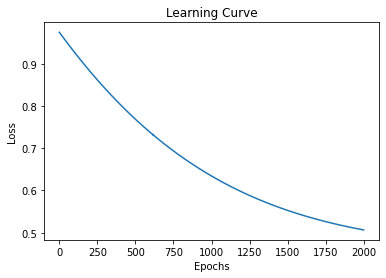

<Figure size 576x576 with 0 Axes>

Confusion matrix with normalization


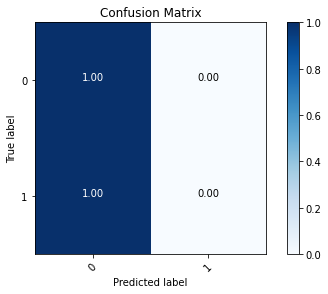

<Figure size 576x576 with 0 Axes>

Confusion matrix without normalization


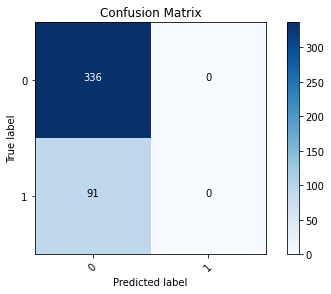

<Figure size 576x576 with 0 Axes>

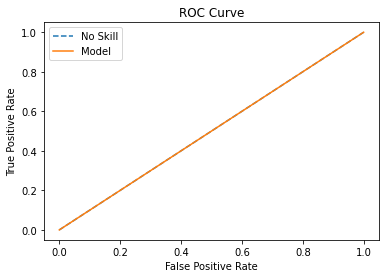

<Figure size 576x576 with 0 Axes>

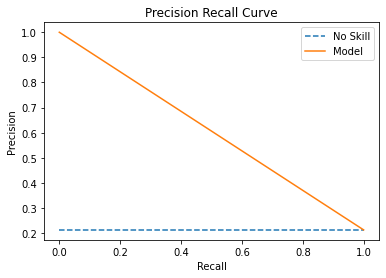

<Figure size 576x576 with 0 Axes>

Classification report:
              precision    recall  f1-score   support

         0.0       0.79      1.00      0.88       336
         1.0       0.00      0.00      0.00        91

    accuracy                           0.79       427
   macro avg       0.39      0.50      0.44       427
weighted avg       0.62      0.79      0.69       427

ROC AUC: 0.500
Precision Recall AUC: 0.607
F1 Score: 0.000
F2 Score: 0.000


/Users/aru/code/km3net/venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
device = model_pm_utils.get_device()
model = GNN(4).to(device)

params = {
    'model': model,
    'optimizer': Adam(model.parameters(), lr=0.001),
    'criterion': BCELoss(),
    'epochs': 2000,
    'train_G': train_G,
    'valid_G': None,
    'test_G': [test_G],
    'device': device
}

metrics = model_gcd_utils.evaluate(**params)
for metric in metrics:
    model_eval.evaluate(**metric)